
## Numerical Derivatives


Evaluating, or more accurately estimating, a derivative of a function is a common task for scientists and engineers.  In words, the derivative is the slope of a tangent line to (or rate of change of) a function at a particular point.

The formal mathematical definition of a derviative is:
$$ \frac{df}{dx} = \lim_{\Delta x \rightarrow 0} \left(\frac{\Delta f}{\Delta x} \right) $$
This can be estimated using the **Central Difference Approximation** based on Taylor expansions about a point $x_0$ (see the slides for the full derivation).
$$ f'(x_0) = \frac{f(x_0+h) - f(x_0 -h)}{2h} - \mathcal{O}(h^2) $$
where $h$ is the evaluation point above and below $x_0$.

Here is a function to compute the **CDA** for a function:


In [1]:
def cda(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

In [3]:
def funct(x): 
    return x**2
cda(funct,2.0,0.3)
#Exact value here is 2x for x=2.0 -> dfdx=4.000

3.999999999999999

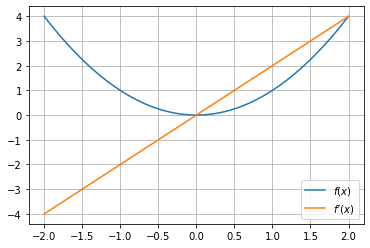

In [4]:
## Also works for arrays of x values
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.linspace(-2.0,2.0,50)
dfdx=cda(funct,x,0.1)
plt.plot(x,funct(x),label='$f(x)$')
plt.plot(x,dfdx,label="$f'(x)$")
plt.grid()
plt.legend()


Simialarly ** Forward ** and **Backward Difference Approximations** can be defined (respectively) as:
$$ f'(x_0) = \frac{f(x_0+h) - f(x_0)}{h} - \mathcal{O}(h) $$
$$ f'(x_0) = \frac{f(x_0) - f(x_0 -h)}{h} - \mathcal{O}(h) $$
Note the error is now worse - of order $h$ rather than order $h^2$.  Here's the code defintions:

In [5]:
##Forward difference approximation
def fda(f,x,h):
    '''
    Computes the derivative of f wrt x with interval of h
    using the forward difference approximation (fda).
    '''
    return ( f(x+h) - f(x) )/h

#Backward difference approximation
def bda(f,x,h):
    '''
    Computes the derivative of f wrt x with interval of h
    using the backward difference approximation (fda).
    '''
    return ( f(x) - f(x-h) )/h

Here's a usage example with comparison to an exact solution.

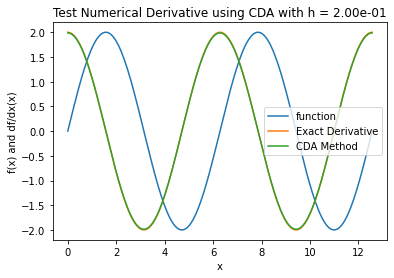

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


#set up parameters for function
a,b,c=2.,1.,0.

def func(x):
    return a*np.sin(b*x+c)

def exact(x):
    return a*b*np.cos(b*x+c)
    
#The x-value at which to compute the derivative
x=2.0
#an initial h-value
h=0.2

#Compute f' (df/dx)
fp=fda(func,x,h)

#The actual df/dx
real=a*b*np.cos(b*x+c)

# Plot the function and it's derivative over a range of x values
x2=np.linspace(0,4*np.pi,200)
plt.plot(x2,func(x2),label = 'function')
plt.plot(x2,exact(x2),label = 'Exact Derivative')
plt.plot(x2,cda(func,x2,h),label = 'CDA Method')
plt.xlabel('x')
plt.ylabel('f(x) and df/dx(x)')
plt.title('Test Numerical Derivative using CDA with h = %2.2e' % h)
plt.legend()



## Numerical Integration

Integration is the process of computing the "area bounded by the function and the abscissa (horizontal axis).  It can be '+' or '-'.

Newton-Cotes methods approximate this area by breaking the space up into regular geometric shapes (typically called panels) and computing and adding up the area of all the panels.

### Trapezoid Method
A panel has the shape of a trapezoid - a rectangle with a triangle on top. Bounding points are connected by a straight line.  The error scales like $ \sim \mathcal{O}(h^2) $ where $h$ is the width of the rectangle.
#### Area of a trapezoid: $ A = [f(a+h)+f(a)] \frac{h}{2} $

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import time as t 

def trap(f,xmin,xmax,numPanels):
    Isum=0.
    h=(xmax-xmin)/float(numPanels)
    for i in range(numPanels):
        x=xmin+i*h
        Isum+=(f(x+h)+f(x))*h/2.
    return Isum

### Simpson's 1/3 Method
Here the top of the panel takes the shape of a parabola, which requires an evaluation at 3 points rather than 2.  Error scales like $\sim \mathcal{O}(h^4)$ but it is not self starting if evaluated on a grid.
###  Integral approximation
$$ \int_a^b f(x) dx \simeq \left[ f(a) + 4f(\frac{a+b}{2})+f(b) \right] \frac{h}{3} $$

In [8]:
def simp13(f,xmin,xmax,numPanels):
    Isum=0.
    h=(xmax-xmin)/float(numPanels)
    for i in range(0,numPanels,2):  # NOTE: skipping every other panel
        x=xmin+i*h
        Isum+=(f(x)+4*f(x+h)+f(x+2*h))*h/3
    return Isum

In [9]:
%matplotlib inline

#def f(x): return np.exp(-x) #x**2-0.1*x**3
#Itrue=-(np.exp(-1.0)-np.exp(0.))

def f(x): return np.sin(x)
Itrue=2.0

numPanels=6
Itrap=trap(f,0,np.pi,numPanels)
Isimp=simp13(f,0,np.pi,numPanels)

errortrap=(abs(Itrap-Itrue)/Itrue*100.)
errorsimp=(abs(Isimp-Itrue)/Itrue*100.)

print('='*50)
print("True value = %2.4f" % Itrue)
print('='*50)
print("Integral by trapeziod with %i panels  = %3.7f" % (numPanels,Itrap))
print("Error for Trap is %3.4f percent" % errortrap)
print('='*50)
print("Integral by Simpson 1/3 with %i panels  = %3.7f" % (numPanels,Isimp))
print("Error for Simp is %3.4f percent" % errorsimp)
print('='*50)

True value = 2.0000
Integral by trapeziod with 6 panels  = 1.9540972
Error for Trap is 2.2951 percent
Integral by Simpson 1/3 with 6 panels  = 2.0008632
Error for Simp is 0.0432 percent


### Exercise 1

Write a function that, given a list of abscissa values $x_i$ and function values $f_i(x_i)$, returns a list of values of the second derivative $f''(x_i)$ of the function. Test your function by giving it a list of known function values for $\\sin(x)$ and making a graph of the differences between the output of the function and $sin(x)$. Use formulat 5.109 page 148 from the handout

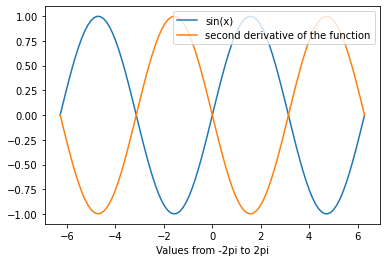

In [69]:
def secdev(x,y,f,h):
    l = (((f(x+h))-(2*f(x))+(f(x-h)))/(h**2))
    return l

x = np.linspace(-2*np.pi,2*np.pi,100)
y = np.sin(x)
f = np.sin

p = secdev(x,y,f,0.1)

plt.plot(x,y, label='sin(x)')
plt.xlabel('Values from -2pi to 2pi')
plt.plot(x,p, label='second derivative of the function')
plt.legend(loc='upper right')

### Exercise 2

Compare results of the trapezoid integration method and Simpson’s method, for the following integrals:

$$\int_0^{\pi/2}\cos x\, dx $$,
$$\int_1^3 \frac{1}{x^2}\, dx $$,
$$\int_2^4 (x^2+x+1)\, dx $$,
$$\int_0^{6.9}\cos\left(\frac{\pi}{2}x^2\right)\, dx$$,

For each integral, try it with more and with fewer slices to determine how many slices are required to give an ‘acceptable’ answer. (If you double the number of slices and still get the same answer, then try half as many, etc.) Integrals (3) and (4) are particularly interesting in this regard. 

In [119]:
def trap(f,xmin,xmax,numPanels):
    Isum=0.
    h=(xmax-xmin)/float(numPanels)
    for i in range(numPanels):
        x=xmin+i*h
        Isum+=(f(x+h)+f(x))*h/2.
    return Isum

def simp13(f,xmin,xmax,numPanels):
    Isum=0.
    h=(xmax-xmin)/float(numPanels)
    for i in range(0,numPanels,2):  # NOTE: skipping every other panel
        x=xmin+i*h
        Isum+=(f(x)+4*f(x+h)+f(x+2*h))*h/3
    return Isum
def f2(x):
    return (1/x**2)
def f3(x):
    return(x**2+x+1)
def f4(x):
    return(np.cos((np.pi/2)*(x**2)))

p = trap(np.cos,0,np.pi/2,20) #Trapezoid evaluation for the function Cos(x) from 0 to Pi/2, which should equal 1
print("Trapezoid Evaluation = ",p)
p = simp13(np.cos,0,np.pi/2,10) #Simpson's evaluation for the function Cos(s) from 0 to Pi/2, which should equal 1
print("Simpson's Evaluation = ",p)
print('')

p = trap(f2,1,3,20) #Trapezoid evaluation for the function 1/x^2 from 1 to 3, which should equal 2/3
print("Trapezoid Evaluation = ",p)
p = simp13(f2,1,3,8) #Simpson's evaluation for the function 1/x^2 from 1 to 3, which should equal 2/3
print("Simpson's Evaluation = ",p)
print('')

p = trap(f3,2,4,20) #Trapezoid evaluation for the function x^2+x+1 from 2 to 4, which should equal 80/3 or 26.667
print("Trapezoid Evaluation = ",p)
p = simp13(f3,2,4,10) #Simpson's evaluation for the function x^2+x+1 from 2 to 4, which should equal 80/3 pr 26.667
print("Simpson's Evaluation = ",p)
print('')

p = trap(f4,0,6.9,275) #Trapezoid evaluation for the function Cos(pi/2*x^2) from 0 to 6.9, which should equal 0.473
print("Trapezoid Evaluation = ",p)
p = simp13(f4,0,6.9,190) #Simpson's evaluation for the function Cos(pi/2*x^2) from 0 to 6.9, which should equal 0.473
print("Simpson's Evaluation = ",p)
print('')


Trapezoid Evaluation =  0.999485905248533
Simpson's Evaluation =  1.0000033922209006

Trapezoid Evaluation =  0.6682683087950135
Simpson's Evaluation =  0.667097627133702

Trapezoid Evaluation =  26.669999999999998
Simpson's Evaluation =  26.666666666666668

Trapezoid Evaluation =  0.47388257200788775
Simpson's Evaluation =  0.47316218530470705



### Exercise 3: 
Do excercise 5.4 from the handouts, diffraction limit of a telescope.
    

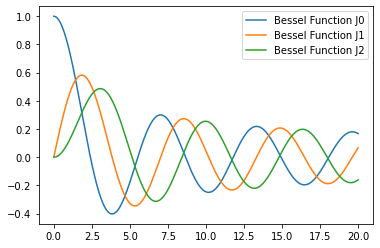

In [149]:
def simp13(m,x,Omin,Omax,numPanels):
    Isum = 0.
    h=(Omax-Omin)/float(numPanels)
    for i in range(0,numPanels,2):  # NOTE: skipping every other panel
        O=Omin+i*h
        
        Isum += ((np.cos(m*O - x*np.sin(O)) + 4*(np.cos(m*(O+h) - x*np.sin(O+h))) + np.cos(m*(O+(2*h)) - x*np.sin(O+(2*h))))*h)/3
    
    eIsum = Isum / np.pi
    
    return eIsum

#function = (np.cos((m*O)-(x*np.sin(O))))/np.pi

x = np.linspace(0,20,1000)

y = simp13(0,x,0,np.pi,1000)
z = simp13(1,x,0,np.pi,1000)
b = simp13(2,x,0,np.pi,1000)

plt.plot(x,y, label ='Bessel Function J0')
plt.plot(x,z, label ='Bessel Function J1')
plt.plot(x,b, label ='Bessel Function J2')
plt.legend(loc='upper right')

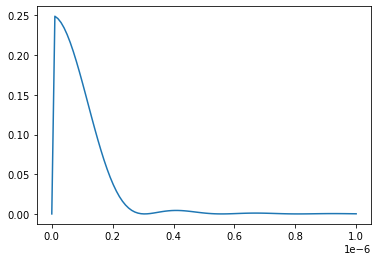

In [206]:
def Intes(lam,r):
    k = (2*np.pi) / lam
    u = k*r
    if(r <= 10**-8):
        return (1/(2*k))**2
    
    I = ((simp13(1,u,0,np.pi,1000)) / u)**2
    return I

r = np.linspace(0,1*(10**-6),100)
lam = 500*(10**-9)

vecIntes = np.vectorize(Intes)
L = vecIntes(lam,r)

plt.plot(r,L)